<a href="https://colab.research.google.com/github/otse-lemi/Hamoye/blob/master/hamoyeinternship_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing dataset
df=pd.read_csv("electricity_grid.csv")

In [ ]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [ ]:
df.shape

(10000, 14)

In [ ]:
#droping the stab column
df.drop(columns="stab",axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


In [ ]:

x=df.iloc[:,:12]
y=df.iloc[:,12:]

In [ ]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1)

In [ ]:
#normalize the data to put all the values in the same range
scaler=StandardScaler().fit(x_train)
x_trained_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

Model building

### Random Forest Classifier

In [ ]:

from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(random_state=1)
forest.fit(x_trained_scaled,y_train)
forest.score(x_test_scaled,y_test)


C:\Users\Homet\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.929

In [ ]:
forest_pred=forest.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,confusion_matrix

In [ ]:
def evaluate(predicted,actual_value):
    accuracy=accuracy_score(y_true=actual_value,y_pred=predicted)
    print('accuracy :',round(accuracy,4))
    f1score=f1_score(actual_value,predicted,pos_label='stable')
    print("f1score :",f1score)
    

Quuestuion 14

In [ ]:

evaluate(forest_pred,y_test)

accuracy : 0.929
f1score : 0.8979885057471264


Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
Extra=ExtraTreesClassifier(random_state=1)
Extra.fit(x_trained_scaled,y_train)
Extra.score(x_test_scaled,y_test)

C:\Users\Homet\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.928

In [ ]:
ext_prediction=Extra.predict(x_test_scaled)
evaluate(ext_prediction,y_test)

accuracy : 0.928
f1score : 0.8938053097345133


### XGBOOST

In [ ]:
from xgboost.sklearn import XGBClassifier

C:\Users\Homet\Anaconda3\lib\site-packages\distributed\utils.py:133: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10065] A socket operation was attempted to an unreachable host
  RuntimeWarning,


In [ ]:
xgb=XGBClassifier(random_state=1)
xgb.fit(x_trained_scaled,y_train)
xgb.score(x_test_scaled,y_test)

C:\Users\Homet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9455

# Question 15

In [ ]:
xgb_prediction=xgb.predict(x_test_scaled)
evaluate(xgb_prediction,y_test)

accuracy : 0.9455
f1score : 0.9224199288256227


In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
df=pd.read_csv('electricity_grid.csv')

df.drop(columns="stab",axis=1,inplace=True)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

#seperating the dataset into predictor and target label
x=df.iloc[:,:12]
y=df.iloc[:,12:]

y_binary=pd.get_dummies(y)

y_binary.drop('stabf_stable',axis=1,inplace=True)

x_train,x_test,y_train,y_test=train_test_split(x,y_binary,test_size=0.2, random_state=1)

#normalize the data to put all the values in the same range
scaler=StandardScaler().fit(x_train)
x_trained_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

Lgb = LGBMClassifier(random_state =1)

Lgb.fit(x_trained_scaled,y_train)
Lgb.score(x_test_scaled,y_test)


lgb_pred=Lgb.predict(x_test_scaled)


C:\Users\Homet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Question 16

In [ ]:
evaluate(lgb_pred,y_test)

accuracy : 0.9375


C:\Users\Homet\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1254: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: pos_label='stable' is not a valid label: array([0, 1], dtype=uint8)

### Extratrees classifier with a radonm search cv

In [ ]:
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]



min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,
            

                       'max_features': max_features}

In [ ]:
Random_extra=RandomizedSearchCV(Extra,param_distributions=hyperparameter_grid,cv=5,n_jobs=-1,
                                    scoring = 'accuracy', verbose = 1,random_state=1,n_iter=10)

In [ ]:
Random_extra.fit(x_trained_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.3min finished
C:\Users\Homet\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1, scoring='accuracy', verbose=1)

### Question 17

In [ ]:
print(Random_extra.best_params_)

{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None}


In [ ]:
random_predict=Random_extra.predict(x_test_scaled)

In [ ]:
evaluate(random_predict,y_test)

accuracy : 0.927
f1score : 0.8945086705202311


NEW Extra tree classifier
Question 18

In [ ]:
Extra2=ExtraTreesClassifier(random_state=1,n_estimators=1000, min_samples_split=2, min_samples_leaf= 8, max_features= None)
Extra2.fit(x_trained_scaled,y_train)
Extra2.score(x_test_scaled,y_test)

C:\Users\Homet\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.927

In [ ]:
ex_pred=Extra2.predict(x_test_scaled)
evaluate(ex_pred,y_test)

accuracy : 0.927
f1score : 0.8945086705202311


In [ ]:
### Question 20

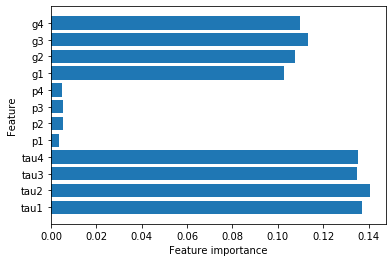

In [ ]:
def plot_feature_importances(model):
    n_features = x_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),df.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(Extra2)
